In [1]:
import numpy as np
import pandas as pd
import spacy
import scipy
import re

In [2]:
df = pd.read_csv("All_Data")
# drop unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis=1)
# drop Nan value row
df = df.dropna(axis=0, how='all')

In [3]:
nlp = spacy.load('en')

In [8]:
# Put df ratings and reviews col into ratings and reviews variables
Ratings = df.loc[:, "Ratings"]
Reviews = df.loc[:, 'Reviews']

In [124]:
# extract out 500 samples
review_sample = Reviews.sample(500)
rating_sample = Ratings.sample(500)

In [125]:
# Now we are going to clean up the reviews
cleanup_re = re.compile('[^A-Za-z]+')
def cleanup(sentence):
#     sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [126]:
review_sample = review_sample.apply(lambda x: cleanup(str(x)))

In [127]:
review_sample

14519    Excellent value I like the ease of use and qua...
2877     real good sound out of them fits over ear real...
43570    My yr old daughter looks so cool in these head...
14469    Love these headphones could make the headphone...
39003    This is the second pair of these headphones th...
5290     The headphones are great High quality and defi...
43154    Order these for a birthday present they ve bee...
8951     I was very pleased with the headphones They ar...
6779                                                 Great
9321     Love them they have sound loud if you like it ...
10896                       Great headphones Amazing sound
787      Good range for a bluetooth device Sounds great...
42575    I ve had these for a few months now and use th...
35246    I read the reviews and they were positive I am...
40152    I bought these specifically to use with my pho...
40178    I love Shure Sound Isolating Earphones They ar...
7964     Not at all worth the price the sound is echo y.

In [30]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [89]:
from nltk.tokenize import RegexpTokenizer
def get_bigram_likelihood(statements, freq_filter=3, nbest=200):
    """
    Returns n (likelihood ratio) bi-grams from a group of documents
    :param        statements: list of strings
    :param output_file: output path for saved file
    :param freq_filter: filter for # of appearances in bi-gram
    :param       nbest: likelihood ratio for bi-grams
    """
    #words = list()
    #tokenize sentence into words
    #for statement in statements:
        # remove non-words
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(statements)
    
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    bigram_finder = BigramCollocationFinder.from_words(words)

    # only bi-grams that appear n+ times
    bigram_finder.apply_freq_filter(freq_filter)

    # TODO: use custom stop words
    bigram_finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in nltk.corpus.stopwords.words('english'))

    bigram_results = bigram_finder.nbest(bigram_measures.likelihood_ratio, nbest)

    return bigram_finder.score_ngrams(bigram_measures.likelihood_ratio)

In [80]:
data = review_sample.tolist()

In [81]:
data = ''.join(data)

In [91]:
bigrams = get_bigram_likelihood(data, freq_filter=3, nbest=200 )

In [98]:
review_sample.sort_values().reset_index(drop=True)

0      adjust great to kids heads a little bulky but ...
1                 after a few days only right ear worked
2      after a lot of research my fiance had put thes...
3      after one month of heavy use i dont regret get...
4      after only one week of use one side is already...
5      after reading from about positive reviews on t...
6      after the bluetooth headset power on the heads...
7      amazing headphones easy to wear comfortable so...
8      amazing headphones less noise pollution than m...
9      amazing product astonishing sound i m in love ...
10             amazing quality and overall solid product
11     amazing quality for the price the noise cancel...
12     amazing sound quality for the price they re no...
13                                       arrived damaged
14                     arrived on time very easy to pair
15                 arrived quickly and just as described
16     at first i got a pair that had some trouble bu...
17                             

In [99]:
from IPython.display import Image

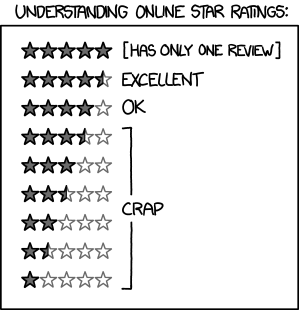

In [100]:
Image("https://imgs.xkcd.com/comics/star_ratings.png")

In [101]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Anaconda3\envs\chatbot\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [103]:
review_sample.values[:5]

array(['i purchased two of these on aug one failed in approximately days and one in days both outside the amazon return window requested help or at least sympathy lol from the shipper and received none i do recognize that the shipper does not warrant the product however they normally have a better rapport with the manufacturer they represent the units worked great until they both failed to pair with any of several devices they had been pairing with this is the first negative review i can remember giving',
       'these headphones are very nice good fit and nice sound with very good base quality',
       'i really like these i m not a head phone person meaning i don t know all the ins and outs specs but they serve the purpose i bought them for sound quality is good and i like the ability to switch between wireless wire without a hassle if you are just looking for a pair for everyday normal uses then these work great',
       'truth in advertising it does what it s supposed to do at the 

In [5]:
import re
import itertools
from __future__ import print_function
import pandas as pd
import datetime as dt
import numpy as np
import nltk
import string
import scipy.sparse as sparse
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

re_spaces = re.compile(r'\s+')

from mpl_toolkits.mplot3d import axes3d
from nltk.corpus import stopwords

In [6]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [109]:
def cleaned_reviews(x):
    return(''.join(re.sub('[^a-zA-Z_]', ' ', x)))
    #return(''.join(re.sub('[^a-zA-Z_]', ' ', x).replace(':',' ').lower().replace('\r',' ').replace('!',' ')))

In [110]:
from nltk.tokenize import RegexpTokenizer
def get_bigram_likelihood(statements, freq_filter=3, nbest=200):
    """
    Returns n (likelihood ratio) bi-grams from a group of documents
    :param        statements: list of strings
    :param output_file: output path for saved file
    :param freq_filter: filter for # of appearances in bi-gram
    :param       nbest: likelihood ratio for bi-grams
    """

    #words = list()
    #tokenize sentence into words
    #for statement in statements:
        # remove non-words
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(statements)

    bigram_measures = nltk.collocations.BigramAssocMeasures()
    bigram_finder = BigramCollocationFinder.from_words(words)

    # only bi-grams that appear n+ times
    bigram_finder.apply_freq_filter(freq_filter)

    # TODO: use custom stop words
    bigram_finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in nltk.corpus.stopwords.words('english'))

    bigram_results = bigram_finder.nbest(bigram_measures.likelihood_ratio, nbest)

    return bigram_finder.score_ngrams(bigram_measures.likelihood_ratio)

In [111]:
table_data = pd.read_csv('All_Data')

In [112]:
df2 = table_data.copy()

In [113]:
df2 = df2.rename(index=str, columns={"Unnamed: 0": "ID"})

In [114]:
df2['Ratings'] = df2['Ratings'].apply(lambda x: str(x).split()[0]).apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [115]:
df2['Ratings'].head()

0    1.0
1    5.0
2    5.0
3    1.0
4    5.0
Name: Ratings, dtype: float64

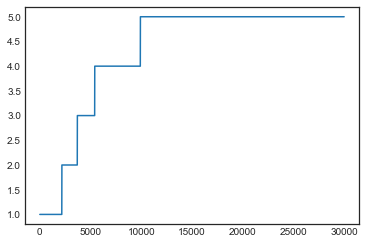

In [116]:
df2['Ratings'].sort_values().reset_index(drop=True).dropna().plot()

In [117]:
df2['Reviews'] = df2['Reviews'].apply(lambda x : cleaned_reviews(str(x)))

In [121]:
df2['Reviews'].head()

0    Cans sound fine  but the AKG branded audio cab...
1    I bought these for my Futaba Sakura cosplay  b...
2    Holy cow  what a set of cans  These are some n...
3    Love this headphone but the left side is loude...
4    Sound leakage   nil mildSound Isolation   Epic...
Name: Reviews, dtype: object

In [25]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yshen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [122]:
df2['Comments'] = df2['Reviews'].apply(lambda x: np.concatenate(np.array([word_tokenize(x)])))

In [51]:
%%time
df2['Comments'].head()

Wall time: 1e+03 µs


0    [Cans, sound, fine, but, the, AKG, branded, au...
1    [I, bought, these, for, my, Futaba, Sakura, co...
2    [Holy, cow, what, a, set, of, cans, These, are...
3    [Love, this, headphone, but, the, left, side, ...
4    [Sound, leakage, nil, mildSound, Isolation, Ep...
Name: Comments, dtype: object

In [54]:
def reattach_contractions(wordlist):
    words = []
    for i, word in enumerate(wordlist):
        if word[0] == "'" or word == "n't":
            words[-1] = words[-1] + word
        else:
            words.append(word)
    return words

In [124]:
df2['Comments'] = df2['Comments'].apply(lambda x: reattach_contractions(x))

In [62]:
df2['Comments'].head()

0    [Cans, sound, fine, but, the, AKG, branded, au...
1    [I, bought, these, for, my, Futaba, Sakura, co...
2    [Holy, cow, what, a, set, of, cans, These, are...
3    [Love, this, headphone, but, the, left, side, ...
4    [Sound, leakage, nil, mildSound, Isolation, Ep...
Name: Comments, dtype: object

In [126]:
def bigramify(words):
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(words)
    finder.apply_freq_filter(3) 
    return finder.nbest(bigram_measures.pmi, 3)

In [127]:
df2['Comments'] = df2['Comments'].apply(lambda x: bigramify(x))

In [64]:
df2['Comments'].head()

0                                             []
1                             [(the, Bluetooth)]
2    [(a, bit), (these, headphones), (that, it)]
3                            [(this, headphone)]
4                                             []
Name: Comments, dtype: object

In [128]:
def sample_reviews(id):
    bigrams_array = df2[df2['ID'] == id]['Comments'].values
    review_texts = df2[df2['ID'] == id]['Reviews'].values
    bigrams_list = bigrams_array.tolist()
    bigrams = []
    for item in bigrams_list:
        for x in item:
            bigrams.append(x)
    if bigrams:
        sample_reviews = []
        review_texts = review_texts
        for bigram in bigrams:
            sample_review_list = list(filter(lambda txt: " ".join(bigram) in txt, review_texts))
            num_reviews = len(sample_review_list)
            if num_reviews != 0:
                sample_review = sample_review_list[0]
                sample_review = sample_review.replace(" ".join(bigram), "****" + " ".join(bigram) + "****")
                start_index = sample_review.index("****")
                sample_text = sample_review[start_index - len(sample_review): start_index + len(sample_review)]
                sample_reviews.append(sample_text)
        return sample_reviews
    else:
        return (list(review_texts))

In [129]:
%%time
df2['Comments'] = df2['ID'].apply(lambda x: sample_reviews(x))

Wall time: 1min 49s


In [67]:
df2['Comments'].head()

0    [Cans sound fine  but the AKG branded audio ca...
1    [****the Bluetooth**** pairing was extremely s...
2    [****a bit**** warm for my taste  but that  s ...
3    [****this headphone**** but the left side is l...
4    [Sound leakage   nil mildSound Isolation   Epi...
Name: Comments, dtype: object

In [68]:
df2['Comments'] = df2['Comments'].apply(lambda x: ' '.join(x))

In [79]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yshen\AppData\Roaming\nltk_data...


True

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

C:\Anaconda3\envs\chatbot\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [81]:
def review_sentiment(string):
    sent = analyser.polarity_scores(string)
    return sent

In [82]:
df_preCol = df2.copy()

In [84]:
df_preCol['Sentiments'] = df_preCol['Reviews'].apply(lambda x: review_sentiment(x))

In [89]:
df_preCol = pd.concat([df_preCol.drop(['Sentiments'], axis=1), df_preCol['Sentiments'].apply(pd.Series)], axis=1)

{'compound': -0.9709, 'neg': 0.129, 'neu': 0.804, 'pos': 0.067}

In [95]:
df_preCol.head()

,ID,Ratings,Reviews,Comments,Sentiments
0,0,1.0,Cans sound fine but the AKG branded audio cab...,Cans sound fine but the AKG branded audio cab...,"{u'neg': 0.129, u'neu': 0.804, u'pos': 0.067, ..."
1,1,5.0,I bought these for my Futaba Sakura cosplay b...,****the Bluetooth**** pairing was extremely si...,"{u'neg': 0.128, u'neu': 0.746, u'pos': 0.126, ..."
2,2,5.0,Holy cow what a set of cans These are some n...,****a bit**** warm for my taste but that s t...,"{u'neg': 0.03, u'neu': 0.781, u'pos': 0.188, u..."
3,3,1.0,Love this headphone but the left side is loude...,****this headphone**** but the left side is lo...,"{u'neg': 0.198, u'neu': 0.618, u'pos': 0.184, ..."
4,4,5.0,Sound leakage nil mildSound Isolation Epic...,Sound leakage nil mildSound Isolation Epic...,"{u'neg': 0.088, u'neu': 0.74, u'pos': 0.171, u..."


In [99]:
df_posCol = df2.copy()
df_posCol['Sentiments'] = df_posCol['Comments'].apply(lambda x: review_sentiment(x))
df_posCol = pd.concat([df_posCol.drop(['Sentiments'], axis=1), df_posCol['Sentiments'].apply(pd.Series)], axis=1)

In [100]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = df_posCol['Comments']
scored_reviews['compound'] = df_posCol['compound']
scored_reviews['negativity'] = df_posCol['neg']
scored_reviews['neutrality'] = df_posCol['neu']
scored_reviews['positivity'] = df_posCol['pos']

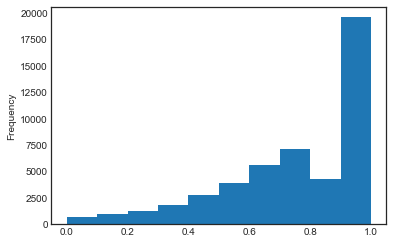

In [102]:
(scored_reviews['neutrality']).plot(kind='hist')

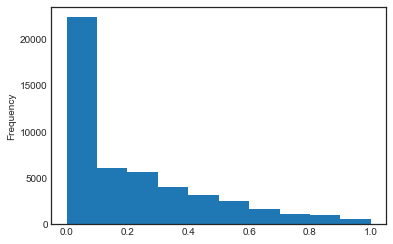

In [103]:
(scored_reviews['positivity']).plot(kind='hist')

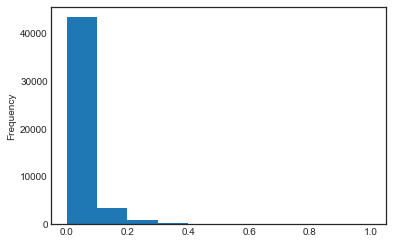

In [104]:
(scored_reviews['negativity']).plot(kind='hist')

In [105]:
scored_reviews

,review,compound,negativity,neutrality,positivity
0,Cans sound fine but the AKG branded audio cab...,-0.9709,0.129,0.804,0.067
1,****the Bluetooth**** pairing was extremely si...,0.6486,0.073,0.826,0.102
2,****a bit**** warm for my taste but that s t...,0.9993,0.024,0.797,0.179
3,****this headphone**** but the left side is lo...,-0.6642,0.206,0.646,0.148
4,Sound leakage nil mildSound Isolation Epic...,0.6808,0.088,0.740,0.171
5,Sounds impeccable Bowers and Wilkins P Wirel...,0.2488,0.120,0.759,0.120
6,Sound Very clear sharp and decent bass I was...,0.9093,0.097,0.730,0.173
7,I have an unfair bias towards AKG headphones b...,0.9771,0.094,0.636,0.270
8,A couple of tries or more is all to often th...,0.9153,0.017,0.794,0.189
9,Definitely more open sounding than any other c...,0.9740,0.000,0.643,0.357


In [106]:
scored_reviews.query('negativity > 0')

,review,compound,negativity,neutrality,positivity
0,Cans sound fine but the AKG branded audio cab...,-0.9709,0.129,0.804,0.067
1,****the Bluetooth**** pairing was extremely si...,0.6486,0.073,0.826,0.102
2,****a bit**** warm for my taste but that s t...,0.9993,0.024,0.797,0.179
3,****this headphone**** but the left side is lo...,-0.6642,0.206,0.646,0.148
4,Sound leakage nil mildSound Isolation Epic...,0.6808,0.088,0.740,0.171
5,Sounds impeccable Bowers and Wilkins P Wirel...,0.2488,0.120,0.759,0.120
6,Sound Very clear sharp and decent bass I was...,0.9093,0.097,0.730,0.173
7,I have an unfair bias towards AKG headphones b...,0.9771,0.094,0.636,0.270
8,A couple of tries or more is all to often th...,0.9153,0.017,0.794,0.189
10,Received a defective prodcut Left ear cup not ...,-0.7725,0.289,0.711,0.000


In [107]:
scored_reviews.query('negativity > positivity').query('negativity > 0.1')

,review,compound,negativity,neutrality,positivity
0,Cans sound fine but the AKG branded audio cab...,-0.9709,0.129,0.804,0.067
3,****this headphone**** but the left side is lo...,-0.6642,0.206,0.646,0.148
10,Received a defective prodcut Left ear cup not ...,-0.7725,0.289,0.711,0.000
11,These are a bit pricey compared to other excel...,-0.6497,0.175,0.716,0.109
26,Serious noise occurs in Bluetooth stateI recei...,-0.4939,0.231,0.769,0.000
29,Good BT headphones I can listen them without ...,-0.8098,0.163,0.733,0.103
31,Not as great sounding as I expected for the pr...,-0.2008,0.166,0.707,0.126
35,Nice akg headphone There is no problem with r...,-0.2732,0.216,0.661,0.123
49,There is no way to forward and reverse tracks ...,-0.7430,0.117,0.853,0.029
56,Not worth more than Not worth more than ...,-0.5903,0.203,0.714,0.084


In [108]:
scored_reviews.query('negativity > positivity').query('compound < -0.2')

,review,compound,negativity,neutrality,positivity
0,Cans sound fine but the AKG branded audio cab...,-0.9709,0.129,0.804,0.067
3,****this headphone**** but the left side is lo...,-0.6642,0.206,0.646,0.148
10,Received a defective prodcut Left ear cup not ...,-0.7725,0.289,0.711,0.000
11,These are a bit pricey compared to other excel...,-0.6497,0.175,0.716,0.109
26,Serious noise occurs in Bluetooth stateI recei...,-0.4939,0.231,0.769,0.000
29,Good BT headphones I can listen them without ...,-0.8098,0.163,0.733,0.103
31,Not as great sounding as I expected for the pr...,-0.2008,0.166,0.707,0.126
35,Nice akg headphone There is no problem with r...,-0.2732,0.216,0.661,0.123
49,There is no way to forward and reverse tracks ...,-0.7430,0.117,0.853,0.029
56,Not worth more than Not worth more than ...,-0.5903,0.203,0.714,0.084
